# Autoregressive Model - AR(p)


In an autoregression model, we forecast using a linear combination of **past values** of the variable. The term **autoregression** describes a regression of the variable against itself. An autoregression is run against a set of **lagged values** of order $p$.

$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an **AR(1)** model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an **AR(2)** model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an **AR(1)** model: $-1 \lt \phi_1 \lt 1$<br>
and for an **AR(2)** model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models **AR(3)** and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AR,ARResults

from pylab import rcParams

rcParams['figure.figsize'] = 20, 6
rcParams['axes.grid'] = True

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_predictions(y_true, y_pred):
    return pd.DataFrame({
        'y mean': pd.np.mean(y_true),
        'mae': mean_absolute_error(y_true, y_pred),
        'mse': mean_squared_error(y_true, y_pred),
        'rmse': pd.np.sqrt(mean_squared_error(y_true, y_pred))
    }).T

## Data

In [4]:
df = pd.read_csv('../meta/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(df.shape)
df.head()

(741, 1)


,POPTHM
DATE,
1959-01-01,175818.0
1959-02-01,176044.0
1959-03-01,176274.0
1959-04-01,176503.0
1959-05-01,176723.0


In [13]:
df.tail()

,POPTHM
DATE,
2020-05-01,329894.0
2020-06-01,330038.0
2020-07-01,330199.0
2020-08-01,330368.0
2020-09-01,330535.0


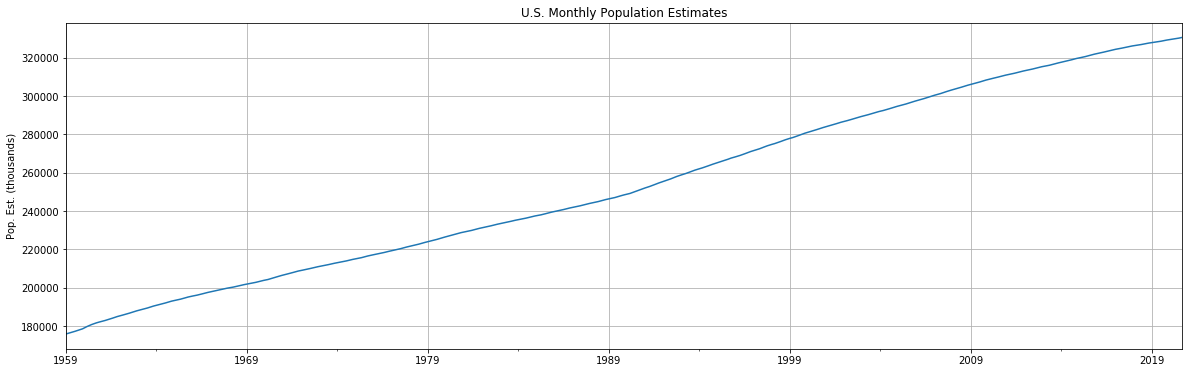

In [5]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' 
ax = df['POPTHM'].plot(title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

**Train Test Split**

In [6]:
train = df.loc[:'2018']
test = df.loc['2019':]

**Required for evaluation**

In [7]:
start = len(train)
end = len(train)+len(test)-1

## AR(1)

Coefficients:
const        205.314335
L1.POPTHM      1.000024
dtype: float64


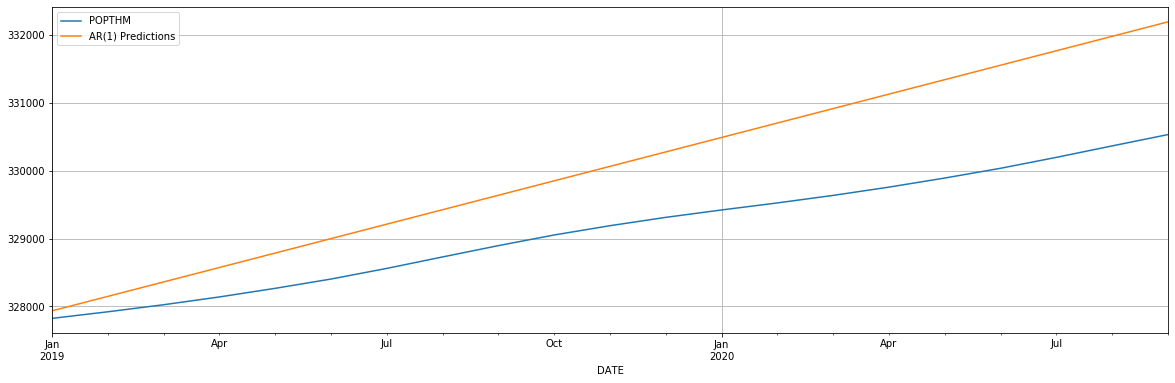

In [8]:
AR1fit = AR(train['POPTHM']).fit(maxlag=1)
print(f'Coefficients:\n{AR1fit.params}')

predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')
test['POPTHM'].plot(legend=True)
predictions1.plot(legend=True);

In [9]:
evaluate_predictions(test, predictions1)

,POPTHM
y mean,3.291290e+05
mae,9.371863e+02
mse,1.100625e+06
rmse,1.049107e+03


## AR(12)

Coefficients:
const         4.612572
L1.POPTHM     2.113926
L2.POPTHM    -1.446191
L3.POPTHM     0.437697
L4.POPTHM    -0.220608
L5.POPTHM     0.107309
L6.POPTHM     0.004378
L7.POPTHM    -0.030811
L8.POPTHM     0.082236
L9.POPTHM     0.072930
L10.POPTHM   -0.183181
L11.POPTHM    0.216121
L12.POPTHM   -0.153816
dtype: float64


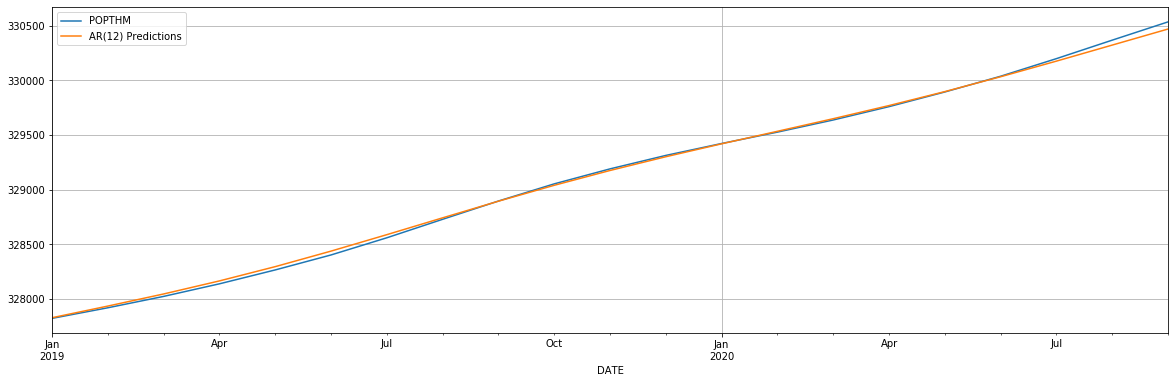

In [10]:
AR12fit = AR(train['POPTHM']).fit(maxlag=12)
print(f'Coefficients:\n{AR12fit.params}')

predictions12 = AR12fit.predict(start=start, end=end, dynamic=False).rename('AR(12) Predictions')
test['POPTHM'].plot(legend=True)
predictions12.plot(legend=True);

In [11]:
evaluate_predictions(test, predictions12)

,POPTHM
y mean,329129.047619
mae,18.679128
mse,586.026136
rmse,24.207977


## Forecasting

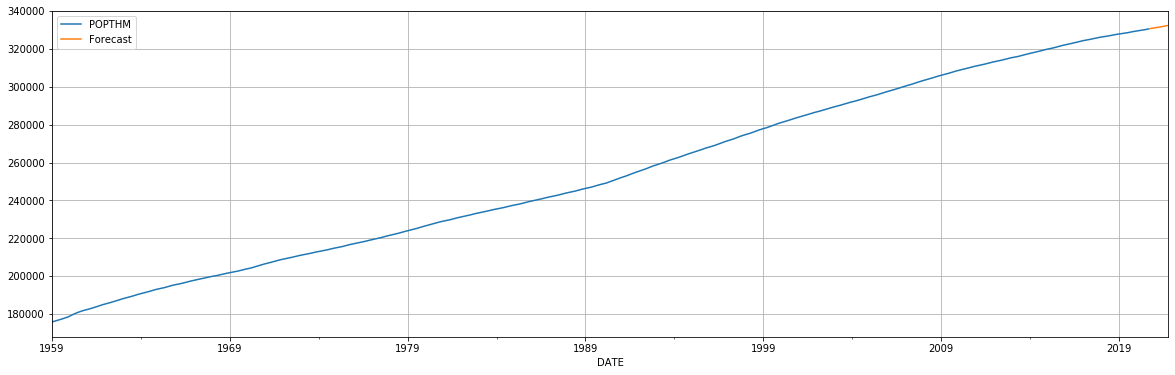

In [12]:
ARfit = AR(df['POPTHM']).fit(maxlag=12)
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')
df['POPTHM'].plot(legend=True)
fcast.plot(legend=True);